**House Prices - Advanced Regression Techniques**
Predict sales prices and practice feature engineering, RFs, and gradient boosting

In [ ]:
%matplotlib inline
import pandas as pd                                               #For data analysis
import numpy as np                                              #for operations on numbers
import matplotlib.pyplot as plt                                 #for figures
import seaborn as sns                                           #for detailed statistical analysis
from sklearn.impute import KNNImputer                           #for KNN imputation
from scipy.stats import zscore                                  #for zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #For normalization and Standardization

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')  #loading the data

In [ ]:
data.head()        #first five rows of data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.columns    #checking features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Separate categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'G

In [ ]:
data.shape  #checking rows and columns

(1460, 81)

<Axes: >

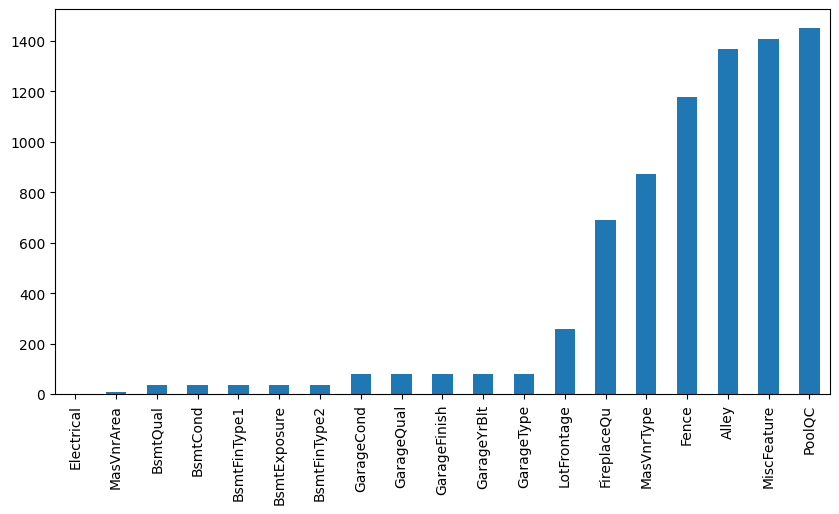

In [ ]:
missing = data.isnull().sum()       #counting any null value
missing =  missing[missing > 0]     #make it greater than 0
missing.sort_values(inplace=True)   #sorting
plt.figure(figsize=(10,5))          #setting the size
missing.plot.bar()                  #visualize   (This data having so many null values as shown in the figure)

In [ ]:
data["SalePrice"].describe()      #Checking statistics of our target variable

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<ipython-input-11-b015270fd6a9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SalePrice"], bins=20);


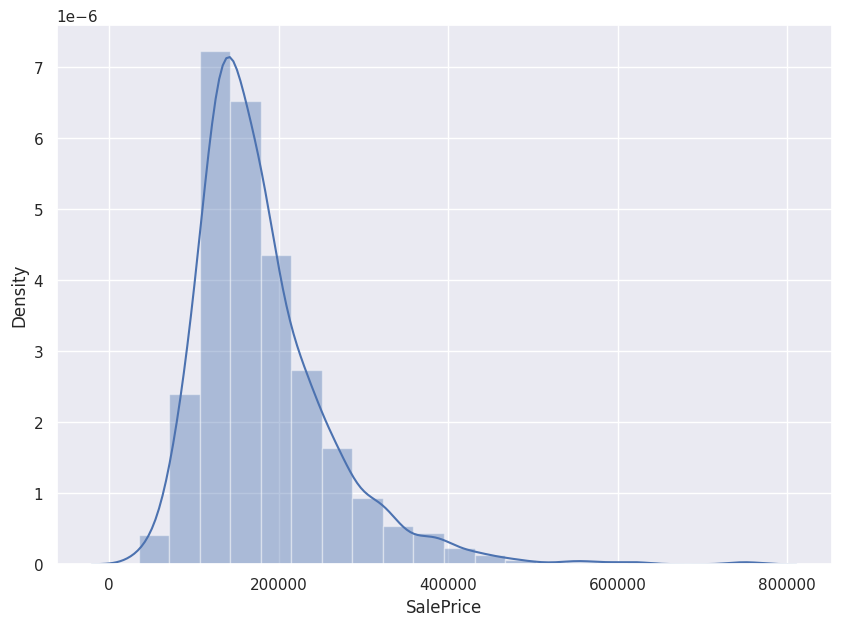

In [ ]:
#Now we have information of Outliers in the data. We have mean, median(50% value), mean is greater than median here.
#We'll now visualize this
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(data["SalePrice"], bins=20);

<Axes: xlabel='SalePrice'>

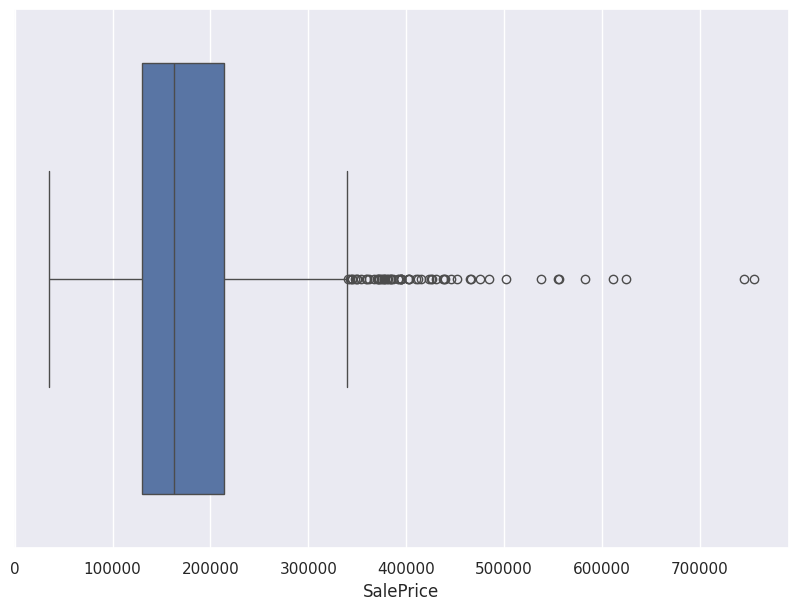

In [ ]:
sns.boxplot(x=data["SalePrice"])           #Visualizing outliers with respected to saleprice.

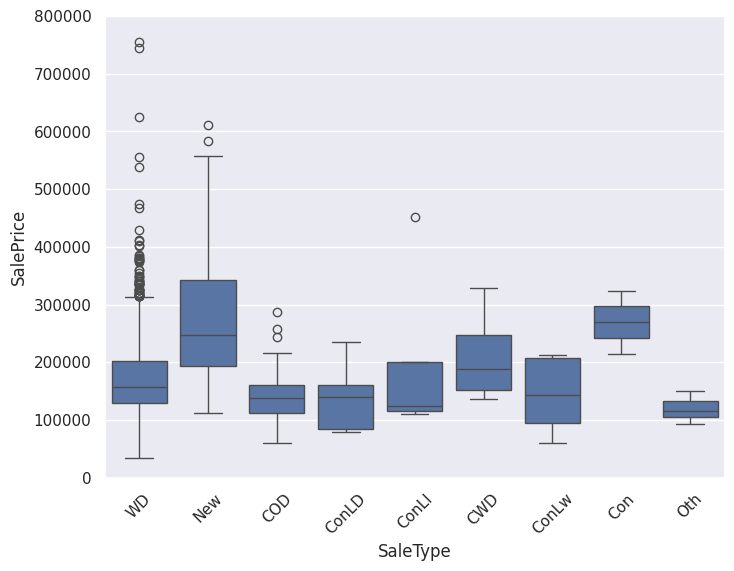

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))                             #Analyzing outliers for different saletypes
fig = sns.boxplot(x="SaleType", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt=plt.xticks(rotation=45)

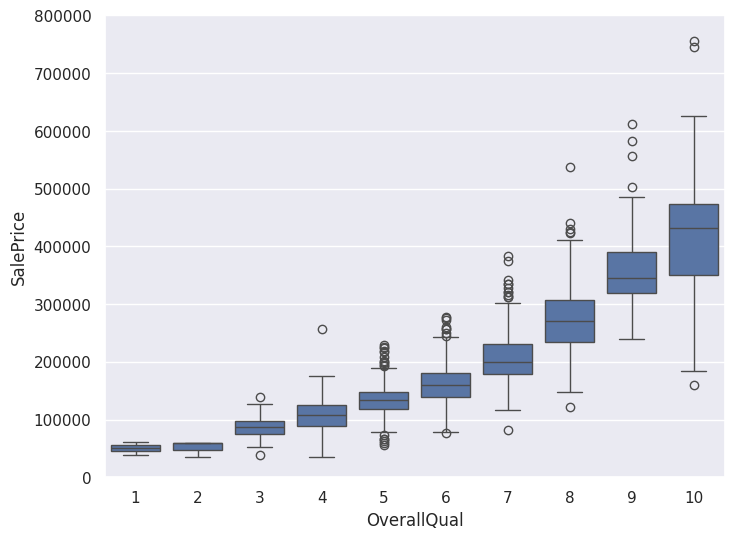

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))                         #For overall quality, sale price is plotting.
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
first_quartile = data["SalePrice"].quantile(0.25)
third_quartile = data["SalePrice"].quantile(0.75)
IQR = third_quartile - first_quartile

In [ ]:
new_boundry = third_quartile + 3* IQR

In [ ]:
data.drop(data[data["SalePrice"]>new_boundry].index,axis=0,inplace=True)

In [ ]:
# Drop columns with more than 40% missing values
threshold = 0.4 * len(data)
columns_to_drop = missing[missing > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)

In [ ]:
# Impute missing numerical data using median
numerical_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())
data_cleaned[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
# Impute missing categorical data using the most frequent value (mode)
categorical_features = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_features:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0])
data_cleaned[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
# Apply KNN imputation for remaining missing values in numerical data
knn_imputer = KNNImputer(n_neighbors=5)
data_cleaned[numerical_features] = knn_imputer.fit_transform(data_cleaned[numerical_features])
data_cleaned[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [ ]:
# Display missing values after handling
remaining_missing = data_cleaned.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)

Remaining Missing Values: 512


In [ ]:
missing = data_cleaned.isnull().sum()
missing = missing[missing > 0]  # Filter columns with missing values
print(missing)

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [ ]:
# Fill missing Electrical value with mode
data_cleaned["Electrical"].fillna(data_cleaned["Electrical"].mode()[0], inplace=True)

# Fill missing categorical basement/garage features with "None"
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data_cleaned[col].fillna("None", inplace=True)

<ipython-input-24-4df306bdf496>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned["Electrical"].fillna(data_cleaned["Electrical"].mode()[0], inplace=True)
<ipython-input-24-4df306bdf496>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
print("Remaining Missing Values:", data_cleaned.isnull().sum().sum())

Remaining Missing Values: 0


In [ ]:
# Check for duplicate records in the dataset
duplicate_count = data_cleaned.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [ ]:
# Identify categorical columns
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical features  (for ordinal categories)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for future reference

# Check encoded data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [ ]:
# Apply One-Hot Encoding , (for non-ordinal categories)
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Check new dataset structure
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
print("Data Types After Encoding:\n", data.dtypes)

Data Types After Encoding:
 Id                   int64
MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
                    ...   
SaleCondition_1       bool
SaleCondition_2       bool
SaleCondition_3       bool
SaleCondition_4       bool
SaleCondition_5       bool
Length: 262, dtype: object


In [ ]:
print(data.dtypes.value_counts())  # See counts of data types

bool       224
int64       35
float64      3
Name: count, dtype: int64


In [ ]:
categorical_remaining = data.select_dtypes(include=['object']).columns
print("Remaining Categorical Columns:", categorical_remaining)

Remaining Categorical Columns: Index([], dtype='object')


In [ ]:
# Identify numerical columns again after preprocessing (for normalization and standardization)
numerical_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [ ]:
# Apply Min-Max Scaling (Normalization: 0 to 1)
min_max_scaler = MinMaxScaler()
data_normalized = data_cleaned.copy()
data_normalized[numerical_features] = min_max_scaler.fit_transform(data_cleaned[numerical_features])

In [ ]:
# Apply Standardization (Z-score: mean = 0, std = 1)
standard_scaler = StandardScaler()
data_standardized = data_cleaned.copy()
data_standardized[numerical_features] = standard_scaler.fit_transform(data_cleaned[numerical_features])

In [ ]:

print("Now the Data is Normalized (Min-Max Scaling")


Now the Data is Normalized (Min-Max Scaling


In [ ]:

print("Standardized Data (Z-score)")

Standardized Data (Z-score)


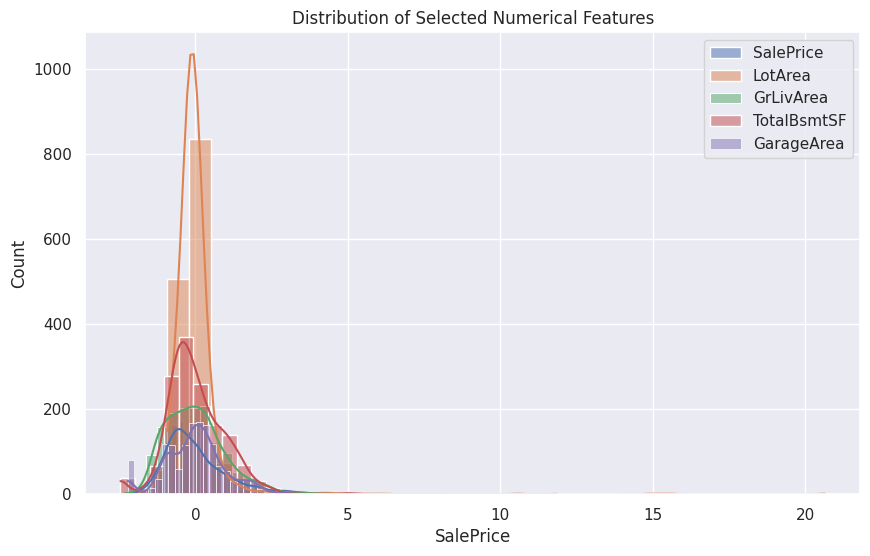

In [ ]:
# Select a few key numerical features for visualization
selected_features = ['SalePrice', 'LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

plt.figure(figsize=(10, 6))
for feature in selected_features:
    sns.histplot(data_standardized[feature], bins=30, kde=True, label=feature)

plt.title("Distribution of Selected Numerical Features")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


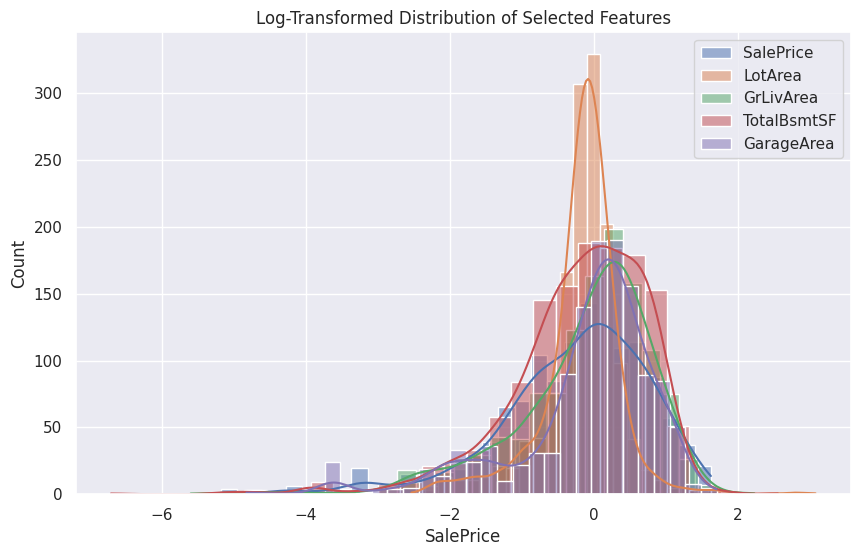

In [ ]:
import numpy as np
for col in selected_features:
    data_standardized[col] = np.log1p(data_standardized[col])  # log(1 + x) to handle zeros

# Replot after transformation
plt.figure(figsize=(10, 6))
for feature in selected_features:
    sns.histplot(data_standardized[feature], bins=30, kde=True, label=feature)

plt.title("Log-Transformed Distribution of Selected Features")
plt.legend()
plt.show()


In [ ]:
# Step 3: Check Data Types
print("Data Types Summary:")
print(data_standardized.dtypes.value_counts())

Data Types Summary:
float64    38
object     37
Name: count, dtype: int64


In [ ]:
cleaned_file_path = "/content/drive/MyDrive/cleaned_dataset.csv"
data_standardized.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")

Cleaned dataset saved successfully at: /content/drive/MyDrive/cleaned_dataset.csv


"""                             **## Data Cleaning Report**

### **1. Dataset Overview**
The dataset was chosen because it included a wide range of data cleaning challenges, such as handling missing values, encoding categorical variables, detecting outliers, and applying feature scaling. Working with this dataset provided valuable hands-on experience in data preprocessing, which will be beneficial for future projects and real-world applications.
The dataset contains real estate features, including lot size, basement area, garage details, and sale price. It was chosen for its relevance in housing price prediction and data preprocessing.

### **2. Challenges Faced**
- **Missing Values**: Some features had significant gaps.
- **Categorical Data**: Needed encoding for machine learning.
- **Outliers**: Extreme values distorted analysis.
- **Feature Scaling**: Varying feature scales required normalization.

### **3. Cleaning Steps and Impact**
- **Missing Values**: Dropped columns (>40% missing), imputed numerical (median) and categorical (mode) data.
- **Encoding**: Applied One-Hot Encoding to categorical variables.
- **Outliers**: Used IQR method to remove extreme values.
- **Scaling**: Min-Max Scaling for normalization, Z-score for standardization, log transformation for skewed features.

### **4. Insights and Readiness**
- Log transformation improved feature distribution.
- Feature scaling ensured consistent data ranges.
- Encoded categorical variables are model-ready.
- No missing values remain, making the dataset reliable.

### **5. Conclusion**
The dataset is now prepared for exploratory data analysis and model training, ensuring meaningful insights and improved predictive accuracy."""



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to PDF "/content/drive/MyDrive/24i_8020_DSTT_A1.ipynb"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/24i_8020_DSTT_A1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to:

In [ ]:
!jupyter nbconvert --to PDF "24i_8020_DSTT_A1.ipynb"

[NbConvertApp] WARNING | pattern '24i_8020_DSTT_A1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut